In [4]:
# http://www.datacarpentry.org/python-ecology-lesson/
import pandas as pd
surveys_df = pd.read_csv('data/surveys.csv')
surveys_df.head()

record_id  month  day  year  plot_id species_id sex  hindfoot_length  \
0          1      7   16  1977        2         NL   M             32.0   
1          2      7   16  1977        3         NL   M             33.0   
2          3      7   16  1977        2         DM   F             37.0   
3          4      7   16  1977        7         DM   M             36.0   
4          5      7   16  1977        3         DM   M             35.0   

   weight  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [5]:
type(surveys_df)

pandas.core.frame.DataFrame

In [6]:
surveys_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

In [7]:
surveys_df.columns.values

array(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'], dtype=object)

In [8]:
pd.unique(surveys_df.species_id)

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

In [9]:
surveys_df['weight'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

In [10]:
surveys_df['weight'].min()

4.0

In [4]:
data_by_sex = surveys_df.groupby('sex')

In [7]:
data_by_sex['weight'].describe()

sex       
F    count    15303.000000
     mean        42.170555
     std         36.847958
     min          4.000000
     25%         20.000000
     50%         34.000000
     75%         46.000000
     max        274.000000
M    count    16879.000000
     mean        42.995379
     std         36.184981
     min          4.000000
     25%         20.000000
     50%         39.000000
     75%         49.000000
     max        280.000000
Name: weight, dtype: float64

In [15]:
species_counts = surveys_df.groupby('species_id')['record_id'].count()
#species_counts

In [14]:
%matplotlib inline

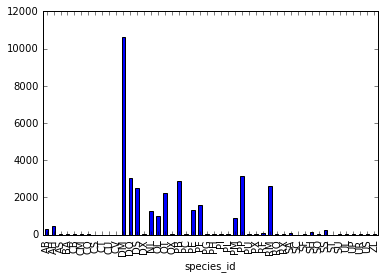

In [17]:
species_counts.plot(kind='bar')

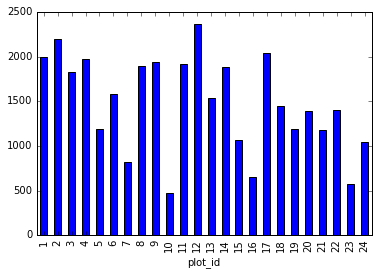

In [19]:
total_count = surveys_df['record_id'].groupby(surveys_df['plot_id']).nunique()
# let's plot that too
total_count.plot(kind='bar');


In [30]:
by_plot_sex = surveys_df.groupby(['plot_id','sex'])
plot_sex_count = by_plot_sex['weight'].sum()
df = plot_sex_count.unstack()

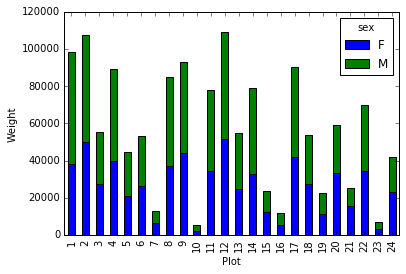

In [35]:
s_plot = df.plot(kind='bar', stacked=True)
s_plot.set_ylabel("Weight")
_ = s_plot.set_xlabel("Plot")

## Loops and functions

In [37]:
import pandas as pd

# Load the data into a DataFrame
surveys_df = pd.read_csv('https://ndownloader.figshare.com/files/2292172')

# Select only data for 2002
surveys2002 = surveys_df[surveys_df.year == 2002]

# Write the new DataFrame to a csv file
surveys2002.to_csv('/Users/hugobowne/repos/python-ecology-lesson/data/yearly_files/surveys2002.csv')

In [40]:
surveys_df['year']

0        1977
1        1977
2        1977
3        1977
4        1977
5        1977
6        1977
7        1977
8        1977
9        1977
10       1977
11       1977
12       1977
13       1977
14       1977
15       1977
16       1977
17       1977
18       1977
19       1977
20       1977
21       1977
22       1977
23       1977
24       1977
25       1977
26       1977
27       1977
28       1977
29       1977
         ... 
35519    2002
35520    2002
35521    2002
35522    2002
35523    2002
35524    2002
35525    2002
35526    2002
35527    2002
35528    2002
35529    2002
35530    2002
35531    2002
35532    2002
35533    2002
35534    2002
35535    2002
35536    2002
35537    2002
35538    2002
35539    2002
35540    2002
35541    2002
35542    2002
35543    2002
35544    2002
35545    2002
35546    2002
35547    2002
35548    2002
Name: year, dtype: int64

## Plotting 

In [68]:
from ggplot import *
surveys_df = pd.read_csv('/Users/hugobowne/repos/python-ecology-lesson/data_output/surveys_complete.csv')

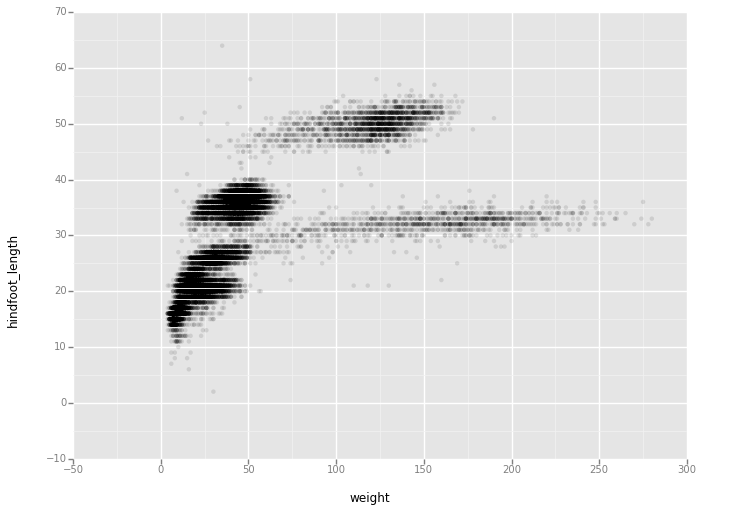

<ggplot: (304540480)>

In [69]:
ggplot(aesthetics=aes(x='weight',y='hindfoot_length'), data=surveys_df) + geom_point(alpha=0.1)

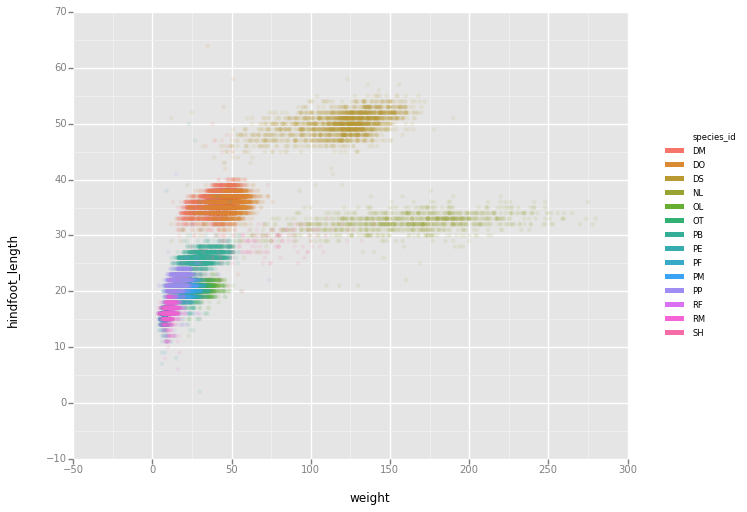

<ggplot: (-9223372036552526869)>

In [71]:
ggplot(aesthetics=aes(x='weight',y='hindfoot_length', color='species_id'), data=surveys_df) + geom_point(alpha=0.1)

In [47]:
surveys_df.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

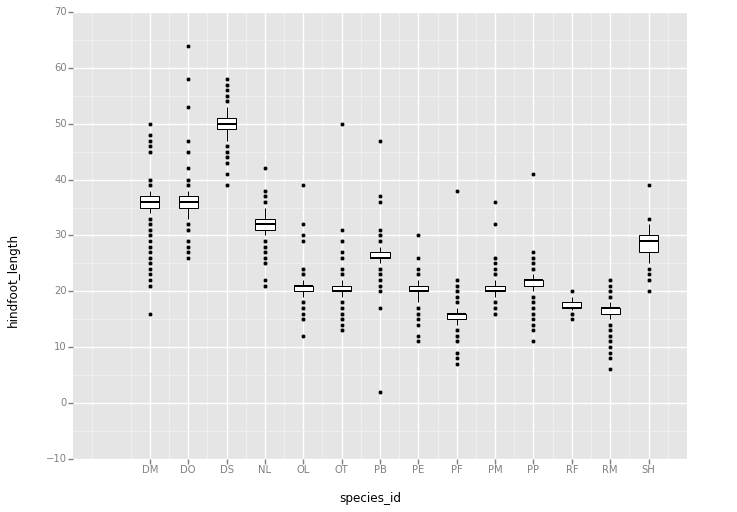

<ggplot: (305455368)>

In [70]:
ggplot( aes(x = 'species_id', y = 'hindfoot_length'), data = surveys_df) + geom_boxplot()

In [64]:
df = pd.read_csv('/Users/hugobowne/Desktop/bouldercreek_09_2013.csv', delimiter="\t", skiprows=range(0,25))

In [65]:
df.head()

agency_cd   site_no          datetime tz_cd 04_00060 04_00060_cd
0        5s       15s               20d    6s      14n         10s
1      USGS  06730200  2013-09-01 00:00   MDT       57           A
2      USGS  06730200  2013-09-01 00:15   MDT       57           A
3      USGS  06730200  2013-09-01 00:30   MDT       57           A
4      USGS  06730200  2013-09-01 00:45   MDT       57           A

In [66]:
import matplotlib.pyplot as plt


## SQLite stuff

In [67]:
import sqlite3

# Create a SQL connection to our SQLite database
con = sqlite3.connect("/Users/hugobowne/repos/python-ecology-lesson/data/portal_mammals.sqlite")

cur = con.cursor()

# the result of a "cursor.execute" can be iterated over by row
for row in cur.execute('SELECT * FROM species;'):
    print(row)

#Be sure to close the connection.
con.close()

('AB', 'Amphispiza', 'bilineata', 'Bird')
('AH', 'Ammospermophilus', 'harrisi', 'Rodent-not censused')
('AS', 'Ammodramus', 'savannarum', 'Bird')
('BA', 'Baiomys', 'taylori', 'Rodent')
('CB', 'Campylorhynchus', 'brunneicapillus', 'Bird')
('CM', 'Calamospiza', 'melanocorys', 'Bird')
('CQ', 'Callipepla', 'squamata', 'Bird')
('CS', 'Crotalus', 'scutalatus', 'Reptile')
('CT', 'Cnemidophorus', 'tigris', 'Reptile')
('CU', 'Cnemidophorus', 'uniparens', 'Reptile')
('CV', 'Crotalus', 'viridis', 'Reptile')
('DM', 'Dipodomys', 'merriami', 'Rodent')
('DO', 'Dipodomys', 'ordii', 'Rodent')
('DS', 'Dipodomys', 'spectabilis', 'Rodent')
('DX', 'Dipodomys', 'sp.', 'Rodent')
('EO', 'Eumeces', 'obsoletus', 'Reptile')
('GS', 'Gambelia', 'silus', 'Reptile')
('NA', 'Neotoma', 'albigula', 'Rodent')
('NX', 'Neotoma', 'sp.', 'Rodent')
('OL', 'Onychomys', 'leucogaster', 'Rodent')
('OT', 'Onychomys', 'torridus', 'Rodent')
('OX', 'Onychomys', 'sp.', 'Rodent')
('PB', 'Chaetodipus', 'baileyi', 'Rodent')
('PC', 'Pipi